# mass center of binary image


In [1]:
# binary mask path
mask_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\right"
one_mask_filename = "1002dozono01 (1).png"

In [2]:
import imageio as iio
import os 
import numpy as np
desired_size = 224
img_path = os.path.join(mask_root, one_mask_filename)
print("img_path:", img_path)

img_path: E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right\1002dozono01 (1).png


In [3]:
# image =  iio.imread(img_path)

# img = image.copy() # has to use this otherwise does not own its data
# img.resize((desired_size,desired_size))

# img2=  np.asarray(img)

from PIL import Image
img = np.array(Image.open(img_path).convert('L').resize((desired_size, desired_size)))
print(img.min(), img.max())
label = np.where(img > 0.5, 1, 0)
print(img)
print(type(img))
print(img.shape)
from skimage.measure import regionprops
# get property by region foreground and raw image\
properties = regionprops(label, img)
print("properties:", properties)
# calculate centeral of mass
print(properties[0])
center_of_mass =  properties[0].centroid
weighted_center_of_mass = properties[0].weighted_centroid
print("center_of_mass:", center_of_mass)
print("weighted_center_of_mass:", weighted_center_of_mass)

0 255
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
(224, 224)
properties: [<skimage.measure._regionprops.RegionProperties object at 0x0000026659995948>]
center_of_mass: (103.79399141630901, 124.22317596566523)
weighted_center_of_mass: (104.05945066859414, 124.56681423924829)


In [4]:
a = np.arange(5)
print("a", a)
# a[0,2] = [-0.1, -4.4]
np.put(a, [0, 2], [-0.1, -5.5])
a


a [0 1 2 3 4]


array([ 0,  1, -5,  3,  4])

(array([  0,   0,   0, ..., 223, 223, 223], dtype=int64), array([  0,   1,   2, ..., 221, 222, 223], dtype=int64))
distances_rows: (233,)
distances_columns: (233,)
final_pos_distance: [0.06182195 0.05797193 0.05737647 0.05712472 0.05357901 0.05293415
 0.05266117 0.05028996 0.04919893 0.04849587 0.04819776 0.04603004
 0.04483547 0.04406285 0.04373453 0.04386049 0.05689141 0.05374876
 0.04355128 0.04181278 0.040494   0.03963684 0.03927153 0.03941177
 0.05390766 0.05057997 0.04743933 0.04452534 0.0395742  0.03765253
 0.03618243 0.03522049 0.03480887 0.034967   0.04761929 0.0442691
 0.04113113 0.03825762 0.03571248 0.03357047 0.03191288 0.03081796
 0.03034668 0.03052794 0.03135042 0.04133856 0.0379591  0.03482483
 0.03200789 0.02959899 0.02770479 0.02643615 0.02588521 0.02609748
 0.02705499 0.0387022  0.03506959 0.03165047 0.02852171 0.02578921
 0.02359106 0.0220874  0.02142493 0.0216809  0.02282445 0.03253796
 0.02882005 0.02534424 0.02222445 0.01963113 0.01779595 0.01696674
 0.01728885 0

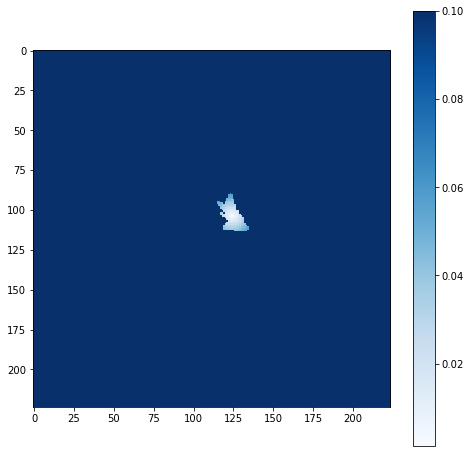

In [10]:
# find nonzeros positions
import math
import itertools
 # Return the indices of the elements that are non-zero.
nonzeros_indices = np.nonzero(img)
# nonzeros_indices2 = np.nonzero(img)
zeros_indices =  np.where(img==0)
print(zeros_indices)
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.imshow(nonzeros_indices )
# Centroid_row_column = (1-center_of_mass[1]/224, center_of_mass[0]/224)
# distances_rows  =  (nonzeros_indices[0]/224-Centroid_row_column[0])**2
# distances_columns =  (nonzeros_indices[1]/224 - Centroid_row_column[1])**2

Centroid_row_column = (center_of_mass[0]/224, center_of_mass[1]/224)
distances_rows  =  (nonzeros_indices[0]/224-Centroid_row_column[0])**2
distances_columns =  (nonzeros_indices[1]/224 - Centroid_row_column[1])**2
final_pos_distance = np.sqrt( distances_rows + distances_columns)

print("distances_rows:", distances_rows.shape)
print("distances_columns:", distances_columns.shape)
# for i, j in itertools.product(range(img.shape[0]), range(img.shape[1])):
#     img[i, j] = 
count = 0

print("final_pos_distance:", final_pos_distance)
print("final_pos_distance.min(), max()", final_pos_distance.min(), final_pos_distance.max())
flatted_img=  img.flatten().astype(float)
nonzeros_indices2 = np.nonzero(flatted_img)
print("nonzeros_indices:", nonzeros_indices)
print("flatted_img:", flatted_img.shape, flatted_img.min(), flatted_img.max())
# np.put(flatted_img, nonzeros_indices, final_pos_distance)
flatted_img[nonzeros_indices2]=final_pos_distance
print(flatted_img.min(),flatted_img.max())
flatted_img=flatted_img.reshape((224, 224))

for i, j in zip(zeros_indices[0], zeros_indices[1]):
    flatted_img[i, j] = 0.1
    count+=1
# cetroids_mass_distances_map = cetroids_mass_distances_map.reshape((224, 224))
# # print("centroids_dis_map:",centroids_dis_map)
# threshold = flatted_img.max() / 2.
figure = plt.figure(figsize=(8, 8))
# # print("min max:", img.min(), img.max())
# for i, j in itertools.product(range(flatted_img.shape[0]), range(flatted_img.shape[1])):
#         color = "white" if flatted_img[i, j] > threshold else "black"
#         plt.text(j, i, "{}({})".format(flatted_img[i, j],flatted_img[i, j]), horizontalalignment="center", color=color)
plt.imshow(flatted_img,interpolation='nearest', cmap=plt.cm.Blues)
# plt.scatter(center_of_mass[1], center_of_mass[0], s=160, c='C0', marker='+')
# plt.scatter(center_of_mass[1], center_of_mass[0], marker='+')
plt.colorbar() 
print("raw_centroids:", center_of_mass)
print("Centroid_row_column:", Centroid_row_column)



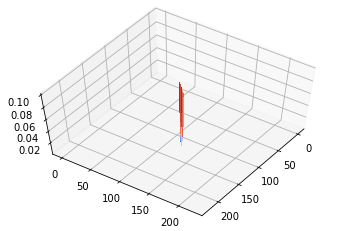

In [11]:
# plot 3d
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0, 224)
Y = np.arange(0, 224)
Z = flatted_img
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.view_init(60, 35)

In [ ]:
# show the image
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(img )
ax.scatter(center_of_mass[1], center_of_mass[0], s=160, c='C0', marker='+')
fig.savefig('MaskWithCenter.png', dpi=300, transparent=False, bbox_inches='tight') 

In [ ]:
# find the mass center
# file_names = ["fileNames"]
# centroids_y = ["Cy"]
# centroids_x = ["Cx"]
def find_mass_centroid(bi_path_list, save=False, save_folder = "", csv_name=""):
    print("genrerate_mass_centroid")
    file_names = ["fileNames"]
    centroids_y = ["Cy"]
    centroids_x = ["Cx"]
    
    i=0
    for path in bi_path_list:
        i+=1
        print("i:", i)
        if i % 20 ==0:
            clear_output(wait=True)
        print(path)
        image = np.array(Image.open(path).convert('L').resize((desired_size, desired_size)))
        label = np.where(image > 0.5, 1, 0)
        num_zeros =  np.count_nonzero(image)
        if num_zeros >0:
            file_name = os.path.basename(path)
            
            properties = regionprops(label, image)
            center_of_mass =  properties[0].centroid
            fig, ax = plt.subplots()
            ax.imshow(image)
            ax.scatter(center_of_mass[1], center_of_mass[0], s=160, c='C0', marker='+')
            yc =  center_of_mass[0]/desired_size
            xc =  center_of_mass[1]/desired_size
            # append to the data list
            file_names.append(file_name)
            centroids_y.append(yc)
            centroids_x.append(xc)
#             print("centroid_np.shape", centroid_np.shape)

            if save==True:
                print("save_folder:", save_folder)
                print("file_name:", file_name)
                save_path = os.path.join(save_folder, file_name)
                print("save_path:", save_path)
                fig.savefig(save_path, dpi=300, transparent=False, bbox_inches='tight') 
        
        else:

            file_name = os.path.basename(path)
            file_names.append(file_name)
#             csv_nam
            yc = 0
            xc = 0
            centroids_y.append(yc)
            centroids_x.append(xc)
        csv_save_path =  os.path.join(save_folder, csv_name)
        print("csv_save_path:", csv_save_path)
        np.savetxt(csv_save_path, [p for p in zip(file_names, centroids_y,centroids_x)], delimiter=',', fmt='%s')
    

In [ ]:
# Train_left_binaris
from glob import glob
from IPython.display import clear_output

Tr_left_bi_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\left"
raw_left_labels_paths =  sorted(glob(Tr_left_bi_root+ "/*.png"))
print("num of left_labels loaded:" , len(raw_left_labels_paths))
output_path ="E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\left_with_mass_centroid"

find_mass_centroid(raw_left_labels_paths, save = True, save_folder = output_path, csv_name = "train_left.csv")

In [ ]:
# clean sk
# You can use IPython.display.clear_output to clear the output of a cell.


In [ ]:
# Train_right_binaris
from glob import glob
Tr_right_bi_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\right"
raw_right_paths =  sorted(glob(Tr_right_bi_root+ "/*.png"))
print("num of left_labels loaded:" , len(raw_left_labels_paths))
output_path ="E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\right_with_mass_centroid"
find_mass_centroid(raw_right_paths, save = True, save_folder = output_path, csv_name = "train_right.csv")

In [ ]:
# Val_right_binaris
from glob import glob
Va_left_bi_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\val_left_right_binary_label\\left"
raw_left_paths =  sorted(glob(Va_left_bi_root+ "/*.png"))
print("num of left_labels loaded:" , len(raw_left_paths))
output_path ="E:\\dataset\\SublingualVein\\TIASRGB2020\\val_left_right_binary_label\\left_with_mass_centroid"
find_mass_centroid(raw_left_paths, save = True, save_folder = output_path, csv_name = "val_left.csv")

In [ ]:
# Val_right_binaris
from glob import glob
Tr_right_bi_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\val_left_right_binary_label\\right"
raw_right_paths =  sorted(glob(Tr_right_bi_root+ "/*.png"))
print("num of left_labels loaded:" , len(raw_left_labels_paths))
output_path ="E:\\dataset\\SublingualVein\\TIASRGB2020\\val_left_right_binary_label\\right_with_mass_centroid"
find_mass_centroid(raw_right_paths, save = True, save_folder = output_path, csv_name = "val_right.csv")